import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sys  

import pycs
from pycs.misc.cosmostat_init import *
from pycs.misc.mr_prog import *
from pycs.misc.im1d_tend import *
from pycs.misc.utilHSS import *
from pycs.misc.stats import *
from pycs.sparsity.mrs.mrs_tools import *

from sys import getsizeof

import healpy as hp

In [1]:
import pycs.sparsity.mrs
from pycs.sparsity.mrs.mrs_tools import *


ModuleNotFoundError: No module named 'pycs'

In [2]:
path_cs='/Users/starck/git/cosmostat/old_cosmostat5_jan2022_pb/examples'
inmap = mrs_read(path_cs+"/data/sphere_mice_kappa.fits")
ns = gnside(inmap)
print("Nside = ", ns)

/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


Nside =  1024


/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/fitsfunc.py:486: UserWarning: Ordering converted to RING
  warnings.warn("Ordering converted to RING")


/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In futur

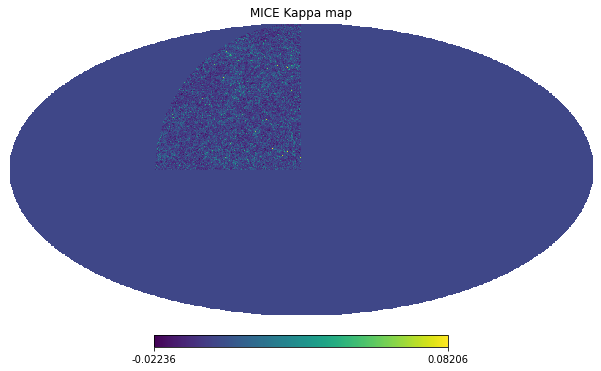

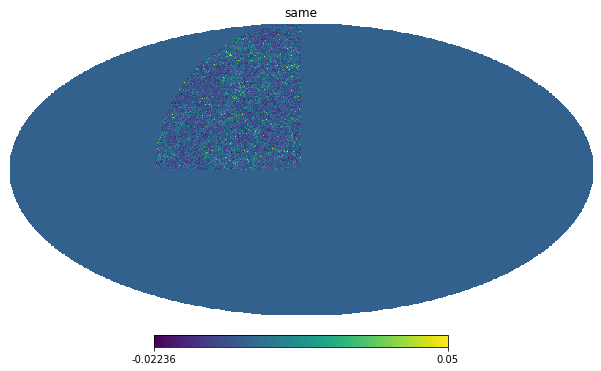

In [3]:
# Display the image.
tvs(inmap, title='MICE Kappa map')
hp.mollview(inmap,max=0.05, title='same')

In [4]:
(ae,ab) = hp.map2alm_spin((inmap,inmap), 2)
hxe= hp.alm2map(ae, ns,pol=False)
he5= hp.smoothing(hxe, sigma=2./360. * (np.pi*2),pol=False)


/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 120.000000 arcmin (0.034907 rad) 
  warnings.warn(
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 282.578405 arcmin
  warnings.warn(


In [18]:
w = mrs_uwttrans(inmap, opt='-v -n3', verbose=True)

/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/fitsfunc.py:197: FutureWarning: The default dtype of write_map() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


CMD =  mrs_uwttrans  -v -n3 -v  ./mr_temp_2022.01.16_23.38.01.fits ./mr_temp_2022.01.16_23.38.01_out.fits


/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/starck/opt/miniconda3/envs/cs/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In futur

<Figure size 432x288 with 0 Axes>

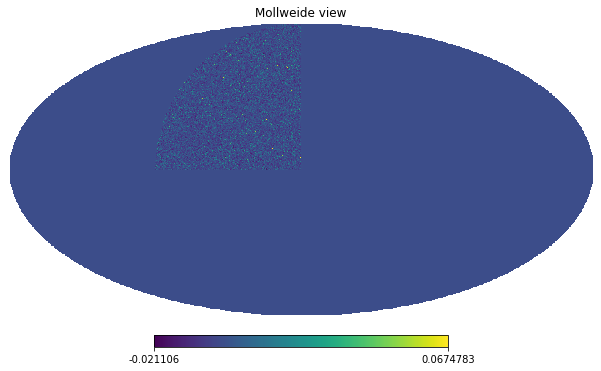

<Figure size 432x288 with 0 Axes>

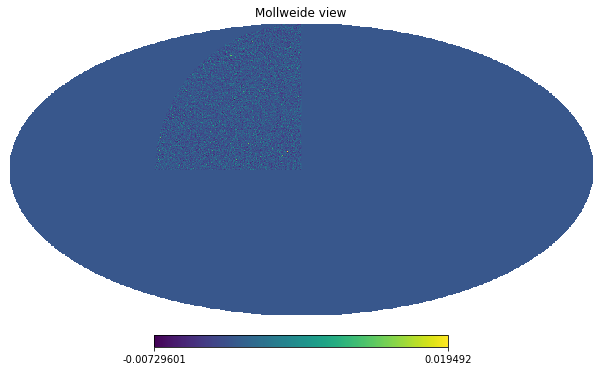

<Figure size 432x288 with 0 Axes>

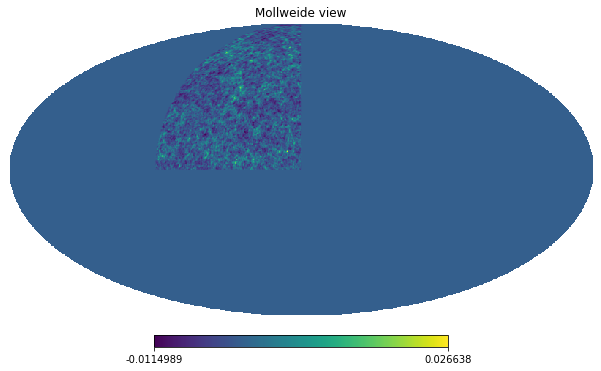

In [19]:
w.shape
for filter_ in range(w.shape[0]):
    fig = plt.figure(filter_)
    hp.mollview(w[filter_, :])
    plt.show()

In [9]:
import imp
imp.find_module('pymrs')
import pymrs


ImportError: dlopen(/Users/starck/git/cosmostat/cosmostat/pymrs.so, 0x0002): symbol not found in flat namespace '_PyCMethod_New'

In [6]:
from ctypes import *

In [11]:
ctypes.CDLL("libSystem.B.dylib")._name

NameError: name 'ctypes' is not defined

In [9]:
import clang
import clang.cindex

ModuleNotFoundError: No module named 'clang'

In [ ]:
import pymrs

In [ ]:
CMRS = pymrs.MRS()

In [ ]:
dump(CMRS)